# Introduction
In this worksheet you will write functions to implement evaluation metrics for classification and regression problems. You will:
 - Use library functions from scikit-learn (https://scikit-learn.org/stable/)
 - Use NumPy and matplotlib
 - Write and call functions in Python
 - Gain understanding of the evaluation metrics used.


Scikit-learn (https://scikit-learn.org/stable/) is a Python library with a wide range of ML algorithms. We will be using some of these algorithms during this course, but we will also be looking at the principles behind the algorithms in order to understand these rather than simply applying functions from libraries.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a 'magic' function `%matplotlib inline` to display plots in the worksheet.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Classification
In this question you will use a toy dataset from scikit-learn. You will use functions from scikit-learn to load the data, divide it into training and testing sets, and then fit a simple classifier to the training set. You will then write functions to calculate accuracy, precision, and recall. Finally, you will check your functions against the functions from scikit-learn.

## Part a) Load the data

In [40]:
# scikit-learn comes with a number of toy datasets (https://sklearn.org/datasets/index.html#toy-datasets)
from sklearn import datasets

# Load the wine dataset from sklearn. You may want to take a look at the format of the dataset
wine = datasets.load_wine()

# Save the datapoints into the variable X and the targets into the variable y
X = wine.data
y = wine.target

Take a look at the target values in y. What do you notice about these? Why are these suitable for a classification algorithm rather than a regression algorithm?

In [41]:
#  Look at the values in y
set(y)
# print(y)

{0, 1, 2}

## Part b) Divide the data into training and testing sets
Use the function `train_test_split` from `sklearn.model_selection` to split out the data and targets into training and testing sets.

In [42]:
# We import the function train_test_split from sklearn and use this to split the data
from sklearn.model_selection import train_test_split

# The function returns splits of each array passed in. 
# The proportion to be used as the training set is given by test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
X_train

array([[1.383e+01, 1.650e+00, 2.600e+00, ..., 1.240e+00, 3.370e+00,
        1.265e+03],
       [1.410e+01, 2.160e+00, 2.300e+00, ..., 1.250e+00, 3.170e+00,
        1.510e+03],
       [1.233e+01, 9.900e-01, 1.950e+00, ..., 1.060e+00, 2.310e+00,
        7.500e+02],
       ...,
       [1.229e+01, 2.830e+00, 2.220e+00, ..., 1.150e+00, 3.300e+00,
        2.900e+02],
       [1.334e+01, 9.400e-01, 2.360e+00, ..., 1.020e+00, 1.930e+00,
        7.500e+02],
       [1.350e+01, 1.810e+00, 2.610e+00, ..., 1.120e+00, 3.820e+00,
        8.450e+02]])

## Part c) Import the k-nearest neighbours classifier and run it on the data
Scikit-learn has a huge range of *estimators* that you can use with your dataset. An estimator is any procedure that can be used to fit data and make predictions from it. Here we will import the k-nearest neighbours classifier, instantiate it, run it on our training set, and then use it to generate some predictions. You will learn more about k-nearest neighbours in Week 14. For now, we are simply using it to generate some predictions.

The general procedure for using the estimators in scikit-learn is as follows. Every estimator has a method `fit(X, y)` and a method `predict(T)`. 

1) Import the estimator
    e.g. `from sklearn.models import Classifier`
    
2) Instantiate the estimator to a variable
    e.g. `est = Classifier(hparams)`
    
3) Fit the estimator to the data
    e.g. `est.fit(X, y)`
    
4) Make a prediction
    e.g. `predictions = est.predict(test_data)`
    
You can see an example of this in the code below:

In [44]:
# We first import the classifier
from sklearn.neighbors import KNeighborsClassifier

# We instantiate the classifier with 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)

# We fit the model using our training data
knn.fit(X_train, y_train)

# Finally, we generate predictions on the test data
ypred_test=knn.predict(X_test)

## Part d) Evaluating the classifier
In this section we will implement functions for accuracy, precision and recall, and compare them with the functions given in sklearn (they should give the same results!)

The wine dataset has 3 classes. We will write functions to compute the accuracy of the classifer, the macro-averaged precision and the macro-averaged recall.

Recall the equations for accuracy, precision, and recall:

$$Accuracy = \frac{\text{Number correct}}{\text{Total datapoints}}$$
i.e. the number of correctly classified datapoints as a proportion of all $n$ datapoints

$$Precision_c = \frac{TP_c}{TP_c+FP_c}$$
i.e. the precision for class $c$ is the number of true positives for class $c$ as a proportion of the total number of positive predictions for class $c$

$$Recall_c = \frac{TP_c}{TP_c+FN_c}$$
i.e. the recall for class $c$ is the number of true positives for class $c$ as a proportion of the total number of actual positives for class $c$

The macro-averaged precision and macro-averaged recall are then simply calculated by averaging the precision (or recall) for each class:

$$Precision = \frac{1}{k} \sum_{c = 1}^k Precision_c, \quad Recall = \frac{1}{k} \sum_{c = 1}^k Recall_c$$

We can automatically generate the confusion matrix for our data using the function `confusion_matrix` from `sklearn.metrics`

In [45]:
# Import the function confusion_matrix
from sklearn.metrics import confusion_matrix

#Build the confusion matrix from the target test set y_test and our predicted values ypred_test
cm = confusion_matrix(y_test, ypred_test)

Take a look at the confusion matrix. What should its dimensions be? 

In [46]:
# Look at the confusion matrix cm
print(cm)

#(i,j)

[[11  0  0]
 [ 0 12  4]
 [ 2  2  5]]


In [47]:
type(y)

numpy.ndarray

(**Optional**) Write a function `my_accuracy` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns accuracy.

In [48]:
import pandas as pd

def my_accuracy(y, pred):
    """
    Calculate accuracy given target values and predicted values using Pandas.
    
    Parameters:
    y (array-like): Array of true target values.
    pred (array-like): Array of predicted values.
    
    Returns:
    float: Accuracy score (proportion of correct predictions).
    """
    df = pd.DataFrame({'y': y, 'pred': pred})
    acc = sum(df['y'] == df['pred']) / len(df)
    return acc


In [49]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
my_accuracy(y_test, ypred_test) == accuracy_score(y_test, ypred_test)

True

(**Optional**) Write a function `my_recall_macro` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns recall. 

In [50]:
from sklearn.metrics import confusion_matrix

def my_recall_macro(y, pred):
    cm = confusion_matrix(y, pred)  # สร้าง confusion matrix
    recall_sum = 0  # ตัวแปรสำหรับเก็บผลรวมของ recall

    # คำนวณ recall สำหรับแต่ละคลาส
    for i in range(cm.shape[0]):
        TP = cm[i, i]  # True Positives
        FN = cm[i, :].sum() - TP  # False Negatives
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # คำนวณ recall
        recall_sum += recall  # รวม recall แต่ละคลาส

    # คำนวณค่า macro-average recall
    return recall_sum / cm.shape[0]

(**Optional**) Write a function `my_precision_macro` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns precision. 

In [51]:
from sklearn.metrics import confusion_matrix

def my_precision_macro(y, pred):
    # คำนวณ confusion matrix
    cm = confusion_matrix(y, pred)
    
    precision_sum = 0  # ตัวแปรเก็บผลรวมของ precision

    # คำนวณ precision สำหรับแต่ละคลาส
    for i in range(cm.shape[0]):
        TP = cm[i, i]  # True Positives
        FP = cm[:, i].sum() - TP  # False Positives (ผลรวมของคอลัมน์ i ลบด้วย TP)
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # คำนวณ precision
        precision_sum += precision  # รวม precision ของคลาสนั้น

    # คำนวณค่า macro-average precision
    return precision_sum / cm.shape[0]


(**Optional**) Check that your functions match those in sklearn.

In [52]:
my_recall_macro(y_test, ypred_test) == recall_score(y_test, ypred_test, average='macro')

True

In [53]:
my_precision_macro(y_test, ypred_test) == precision_score(y_test, ypred_test, average='macro')


True

# 2. Regression

In this question we will use sklearn to fit a linear model to some artificial data. You will then implement a function to calculate the mean squared error and a function to calculate $r^2$.

The model we fit is just a line, i.e. $y = ax + b$. 

## Part a) Create an artificial dataset
We start off by creating some artificial data that is a line with some noise added.

In [54]:
X = np.linspace(0, 10, 101)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [55]:
# We set up a random number generator (rng), seeded with a number (in this case 10). 
# Using a seed means we can generate the same sequence of pseudorandom numbers, and so we can check results easily.
rng = np.random.default_rng(10)  # np.random.default_rng(10) สร้าง Random Number Generator (RNG) โดยใช้เมล็ด (seed) เป็นตัวเลข 10 เพื่อให้การสุ่มเลขนั้นสามารถทำซ้ำได้ (reproducible).

# Seed ช่วยให้การสุ่มตัวเลขในอนาคต (ถ้าใช้ seed เดียวกัน) ผลลัพธ์จะเหมือนเดิมทุกครั้ง ซึ่งมีประโยชน์ในการตรวจสอบผลลัพธ์หรือทดสอบซ้ำ

# a and b are coefficients for the line
a = 2 #slope
b = -1 # y intercept

# Use np.linspace to generate datapoints from 0 to 10 (inclusive) spaced at 0.1
X = np.linspace(0, 10, 101)  #โดยมีจำนวนจุดทั้งหมด 101 จุด.

# Create data Y using the equation for a line
Y = a*X + b # ผลลัพธ์ที่ได้จะเป็นข้อมูลที่มีการกระจายตัวตามสมการเชิงเส้น. Y=2X−1.

# Adds Gaussian noise with mean 0 and standard deviation 3 to the data
Y = Y + 3*rng.standard_normal(len(Y))  # เพิ่ม Gaussian noise ที่มีค่าเบี่ยงเบนมาตรฐาน 3 ให้กับ Y เพื่อจำลองความผันผวนหรือข้อผิดพลาดในข้อมูลที่เกิดจากการทดลองในโลกจริง.

## Part b) Plot the data on named axes

Text(0, 0.5, 'y')

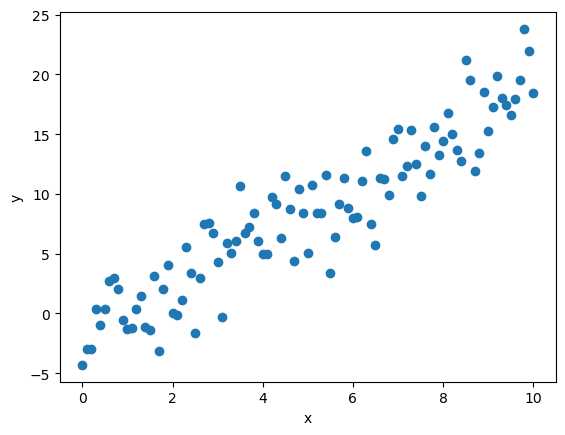

In [56]:
fig, ax = plt.subplots() # This generates us a named figure and axes
ax.scatter(X, Y, label = 'Data') # We generate a scatterplot of the data on the axes.
plt.xlabel('x')
plt.ylabel('y')

## Part c) Split the data into training and testing sets
Split the data X and targets Y into training and testing sets using the function `train_test_split`. Set the proportion of the dataset to use as test data to 0.1.

In [57]:
# Write your answer here
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train

array([8.5, 1.6, 6.7, 9.4, 4.2, 5.6, 2.4, 3.3, 0.5, 7.8, 1.4, 6.3, 0.8,
       4.4, 3.8, 4.5, 9.7, 8.3, 0.6, 0.9, 1.1, 7.3, 0.2, 3.1, 2.8, 8.4,
       6.8, 3.9, 6.5, 2.9, 6.9, 2.3, 7.7, 7.1, 7.6, 2.2, 9. , 4.1, 2.5,
       9.2, 7.9, 1.2, 3.2, 2.7, 6.1, 8.7, 5.3, 2.6, 3.7, 1.7, 3. , 5.2,
       1. , 0.4, 8.1, 9.3, 3.4, 1.3, 4.6, 8.8, 5.1, 2. , 5. , 5.5, 0.3,
       7.4, 6.4, 3.6, 8. , 2.1, 0.7, 3.5, 6. , 1.9, 7.2, 5.4, 9.5, 9.9,
       4. , 8.9, 8.2, 8.6, 4.3, 9.8, 6.6, 6.2, 4.8, 1.8, 4.9, 4.7])

## Part d) Instantiate and fit the estimator
Import the estimator `LinearRegression` from `sklearn.linear_model` and instantiate it. No parameters are needed.

In [58]:
# Write your answer here
# We first import the classifier
from sklearn.linear_model import LinearRegression

# We instantiate the classifier with 5 neighbours
reg = LinearRegression()

You will need to reshape the data (but not the targets) before passing it to this model. 

In [59]:
# This reshapes the data to have 1 column and however many rows make sense for the data
X_train = X_train.reshape(-1, 1) # ในการฝึกโมเดล machine learning (เช่น regression หรือ classification) โมเดลบางประเภท (เช่น linear regression หรือ neural networks) ต้องการให้ข้อมูลในรูปแบบ 2 มิติ:

In [60]:
X_train

array([[8.5],
       [1.6],
       [6.7],
       [9.4],
       [4.2],
       [5.6],
       [2.4],
       [3.3],
       [0.5],
       [7.8],
       [1.4],
       [6.3],
       [0.8],
       [4.4],
       [3.8],
       [4.5],
       [9.7],
       [8.3],
       [0.6],
       [0.9],
       [1.1],
       [7.3],
       [0.2],
       [3.1],
       [2.8],
       [8.4],
       [6.8],
       [3.9],
       [6.5],
       [2.9],
       [6.9],
       [2.3],
       [7.7],
       [7.1],
       [7.6],
       [2.2],
       [9. ],
       [4.1],
       [2.5],
       [9.2],
       [7.9],
       [1.2],
       [3.2],
       [2.7],
       [6.1],
       [8.7],
       [5.3],
       [2.6],
       [3.7],
       [1.7],
       [3. ],
       [5.2],
       [1. ],
       [0.4],
       [8.1],
       [9.3],
       [3.4],
       [1.3],
       [4.6],
       [8.8],
       [5.1],
       [2. ],
       [5. ],
       [5.5],
       [0.3],
       [7.4],
       [6.4],
       [3.6],
       [8. ],
       [2.1],
       [0.7],
      

Call the method `fit` with your training data to train the model

In [61]:
y_train

array([21.16320995,  3.11711566, 11.25394561, 17.41235087,  9.70089945,
        6.36809933,  3.41050593,  5.07206671,  0.37944915, 15.57584015,
       -1.11682103, 13.62505979,  2.02555093,  6.33136058,  8.41529246,
       11.45808596, 19.56005278, 13.69795135,  2.72912771, -0.55230579,
       -1.24444232, 15.3100876 , -2.94541577, -0.33481963,  7.55114603,
       12.7806293 ,  9.87305863,  6.03029328,  5.75886297,  6.69012585,
       14.6352283 ,  5.54407377, 11.68730248, 11.5074973 , 13.99729527,
        1.1181219 , 15.23490546,  4.98788086, -1.6087917 , 19.84203477,
       13.28447828,  0.36843543,  5.90873319,  7.4416904 ,  8.04273074,
       11.88904171,  8.42297219,  2.92995267,  7.22900143, -3.15505509,
        4.28582358,  8.36555045, -1.26479685, -0.94574219, 16.75824   ,
       17.98636731,  6.03039959,  1.44585972,  8.75299444, 13.4426937 ,
       10.74645454,  0.04393318,  5.01359453,  3.42250982,  0.40092757,
       12.51236214,  7.44999366,  6.75105062, 14.43254329, -0.13

In [62]:
# Write your answer here
reg.fit(X_train, y_train)

LinearRegression()

The coefficient(s) and intercept for the trained model ($a$ and $b$ in our case) are called `coef_` and `intercept_`. Are these what you would expect? Are they similar to the values of `a` and `b` that we used to generate the data?

In [63]:
# Look at coef_ and intercept_
intercept = reg.intercept_
print(intercept)

-1.8006925386253751


In [64]:
coeficients = reg.coef_
coeficients = coeficients.astype(float).item()
print(coeficients)

2.0613874441492257


Using the values stored in `coef_` and `intercept_`, plot a line representing the fitted model on the same axes (`ax`) as before. Type `fig` to view the plot.

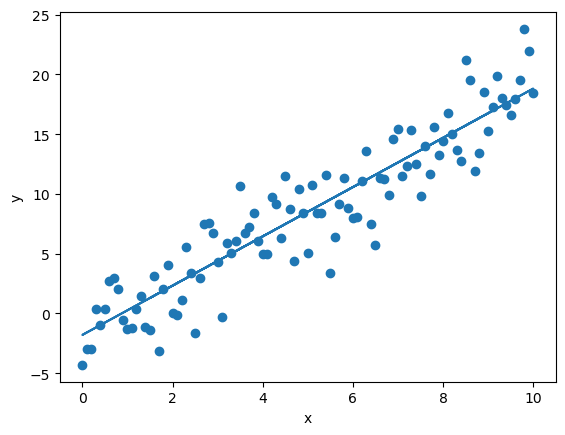

In [65]:
# Write your answer here 
x_value = X_test
y_value = coeficients * x_value + intercept

ax.plot(x_value, y_value)
fig


Reshape the test data to have one column and then call `predict` on the regression model to get the predicted y values

In [67]:
X_test

array([ 5.8,  7.5, 10. ,  9.6,  5.9,  0. ,  0.1,  7. ,  9.1,  1.5,  5.7])

In [68]:
X_test = X_test.reshape(-1, 1)
# Call predict on the regression model and assign the output to 
ypred = reg.predict(X_test)
# a variable ypred
ypred

array([10.15535464, 13.65971329, 18.8131819 , 17.98862693, 10.36149338,
       -1.80069254, -1.59455379, 12.62901957, 16.9579332 ,  1.29138863,
        9.94921589])

## (Optional) Part e) Calculating mean squared error
The equation for the mean squared error is 
$$ MSE = \frac{\sum_{i = 1}^n (y_i - f(x_i))^2}{n} $$
Write a function that takes in arrays for the target values `y` and the predicted values `pred` and returns the mean squared error.

In [69]:
# Fill in the body of the function
def MSE(y, pred):
    mse= np.mean((y-pred)**2)
    return(mse)

Check your function against the function `mean_squared_error` from `sklearn.metrics`

In [70]:
# Write your answer here
from sklearn.metrics import mean_squared_error
mse_result = mean_squared_error(y_test, ypred)

mse_function = MSE(y_test, ypred)

mse_result == mse_function

True

## (Optional) Part f) Calculating R^2
Recall from the lecture that $R^2$ is defined as

$$R^2(y, \hat{y})) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

This represents the proportion of the variance of y that is explained by the independent variables in the model. It is essentially a comparison of the fitted model with the mean of the target values ($\bar{y}$). Implement your own function to calculate $R^2$ and then compare it with `r2_score` from `sklearn.metrics`

In [71]:
# Fill in the body of the function

def rsq(y, pred):
    # คำนวณค่าเฉลี่ยของ y (ค่าจริง)
    mean_y_true = np.mean(y)
    
    # คำนวณ SS_total (ความแปรปรวนทั้งหมด)
    ss_total = np.sum((y - mean_y_true)**2)
    
    # คำนวณ SS_residual (ความคลาดเคลื่อนของโมเดล)
    ss_residual = np.sum((y - pred)**2)
    
    # คำนวณ R-squared
    r2 = 1 - (ss_residual / ss_total)
    
    # คืนค่า R-squared
    return r2



In [72]:
# Compare with sklearn.metrics.r2_score
from sklearn.metrics import r2_score
rsq_result = r2_score(y_test, ypred)

rsq_function = rsq(y_test, ypred)

rsq_function == rsq_result

True

# 3. Using cross-validation for model selection

In this section we will fit a series of classifiers with different parameter settings, and use k-fold cross validation to select the most appropriate parameter values. We will use a *decision tree* classifier. We will cover this classifier in more detail in future lectures. For now, all you need to know is that a decision tree has a parameter `max_depth` that says how many layers the tree may have. More layers means that the tree can divide up the feature space into finer classes, but this could come at the expense of overfitting.

## Part a) 
We first of all create an artificial dataset with 2000 samples, 10 features, and 4 classes.

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 2000, n_features = 10, n_classes=4, n_informative = 3, random_state=10)

# n_informative = 3 3 (features) ที่มีความสัมพันธ์หรือข้อมูลสำคัญที่จะช่วยให้โมเดลสามารถแยกแยะหรือจำแนกคลาสได้
# 7 คุณลักษณะ มี noise (เสียงรบกวน), หรืออาจจะไม่ได้ช่วยในการจำแนกคลาสเลย

Use the function `train_test_split` to separate out 0.2 of your dataset. This will be kept aside as our held-out test set.

In [74]:
# Write your answer here
# Assign the splits to variables Xtr, Xtest, ytr, ytest
Xtr, Xtest, ytr, ytest = train_test_split(X, y, test_size=0.2)


### Part b) Setting up k-fold cross validation
We import the function `KFold` from `sklearn.model_selection`, and instantiate it with 10 folds.

In [75]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=63, shuffle=True) #ข้อมูลจะถูกสุ่มก่อนที่จะทำการแบ่ง จะช่วยให้ข้อมูลถูกสุ่มในลำดับที่ไม่เป็นระเบียบ ซึ่งมีประโยชน์ในกรณีที่เราต้องการหลีกเลี่ยงการมีลำดับข้อมูลที่อาจทำให้โมเดลฝึกได้ไม่ดี
kf

KFold(n_splits=10, random_state=63, shuffle=True)

### Part c) Running cross-validation for different parameter settings
We import the decision tree classifier and run it over depths from 1 to `max_d`. For each depth we run cross-validation over the training set.

การฝึกและประเมินผลของ DecisionTreeClassifier สำหรับค่าความลึก (max_depth) ที่แตกต่างกันโดยใช้การ Cross-validation ในชุดข้อมูลฝึก (training set) และคำนวณความแม่นยำ (accuracy) สำหรับแต่ละความลึกของต้นไม้

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_d = 20
#Set up variables to store training and validation accuracies. 
train_accuracies = [[] for _ in range(max_d)]
val_accuracies = [[] for _ in range(max_d)]

# Loop over depths เพื่อดูว่าdeptไหนดีสุด

for d in range(max_d):
    #Instantiate the DecisionTreeClassifier here. Set the parameter max_depth to d+1
    #We add 1 because d ranges from 0 to max_d-1, but we want depths from 1 to max_d
    clf = DecisionTreeClassifier(max_depth=d+1)
    
    #Loop over cross-validation splits. Note that we perform cross validation on our training data Xtr.
    #We keep our testing data Xtest aside
    for train_index, val_index in kf.split(Xtr):
        Xtrain, Xval = Xtr[train_index], Xtr[val_index]
        ytrain, yval = ytr[train_index], ytr[val_index]
        
        # ส่วนนี้คือการใช้ K-fold cross-validation ซึ่งจะแบ่งชุดข้อมูลฝึก (Xtr, ytr) เป็น k ส่วน (folds) โ
        # ดยใช้การสุ่มเพื่อให้การฝึกและทดสอบในแต่ละครั้งไม่เหมือนกัน โดยการใช้ kf.split(Xtr) จะสร้างดัชนีของข้อมูลในแต่ละส่วน (fold).
        #Fit the classifier on Xtrain and Ytrain
        ###TODO###
        clf.fit(Xtrain, ytrain)
        
        #Make predictions on Xtrain and assign to a variable pred_train
        ###TODO###
        pred_train = clf.predict(Xtrain)
        
        #Make predictions on Xval and assign to a variable pred_val
        ###TODO###
        pred_val = clf.predict(Xval)
        
        #Calculate the accuracy of the predictions on the training set and save in the variable train_accuracies # เก็บค่าไว้ในลิสต์ train_accuracies และ val_accuracies สำหรับแต่ละความลึก d.

        train_accuracies[d].append(accuracy_score(ytrain, pred_train))
        
        #Do the same for the predictions on the validation set
        val_accuracies[d].append(accuracy_score(yval, pred_val))

#Calculate the mean and standard deviation for each depth across splits 
train_accuracy_mean = np.mean(train_accuracies, axis=1) #  axis=1  เพื่อหาค่าเฉลี่ยตามแถว
# Complete the lines and uncomment
train_accuracy_stdev = np.std(train_accuracies, axis=1)
val_accuracy_mean = np.mean(val_accuracies, axis=1)
val_accuracy_stdev = np.std(val_accuracies, axis=1)

# The arrays of means and standard deviation should have shape (max_d, ). The following will generate an error if not.
assert(np.shape(train_accuracy_mean)==(max_d,))
assert(np.shape(train_accuracy_stdev)==(max_d,))
assert(np.shape(val_accuracy_mean)==(max_d,))
assert(np.shape(val_accuracy_stdev)==(max_d,))

print(train_accuracies)

[[0.45416666666666666, 0.45555555555555555, 0.4465277777777778, 0.45, 0.44722222222222224, 0.44583333333333336, 0.4479166666666667, 0.4534722222222222, 0.44930555555555557, 0.44027777777777777], [0.775, 0.7756944444444445, 0.7701388888888889, 0.7736111111111111, 0.7680555555555556, 0.7673611111111112, 0.7680555555555556, 0.7680555555555556, 0.7708333333333334, 0.7638888888888888], [0.7791666666666667, 0.7805555555555556, 0.775, 0.7763888888888889, 0.7715277777777778, 0.7715277777777778, 0.7736111111111111, 0.7722222222222223, 0.7756944444444445, 0.76875], [0.79375, 0.7993055555555556, 0.8048611111111111, 0.7895833333333333, 0.8020833333333334, 0.7888888888888889, 0.7861111111111111, 0.7895833333333333, 0.7909722222222222, 0.7847222222222222], [0.8326388888888889, 0.8222222222222222, 0.8236111111111111, 0.8236111111111111, 0.8222222222222222, 0.8152777777777778, 0.8194444444444444, 0.8208333333333333, 0.8229166666666666, 0.81875], [0.8680555555555556, 0.8611111111111112, 0.8597222222222

### Plotting results

Plot the mean accuracy attained on the training set and on the validation set at each depth. Your figure should look something like the following:

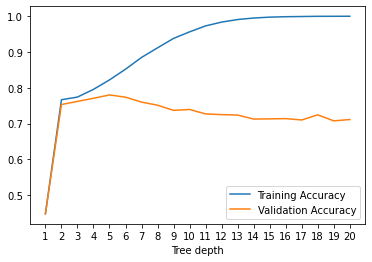

What do you notice about these results? Which value of max_depth would you use for your held-out test set?

In [82]:
train_accuracy_mean
list(range(1,max_d))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

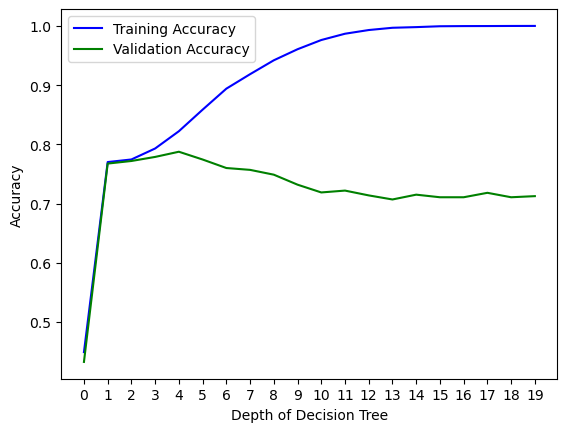

In [83]:
import matplotlib.pyplot as plt

# สร้างกราฟ
fig, ax = plt.subplots()  # สร้างรูป (figure) และแกน (axes)

# วาดกราฟแสดงค่าเฉลี่ยความแม่นยำของชุดฝึก
ax.plot(list(range(max_d)), train_accuracy_mean, label='Training Accuracy', color='blue')

# วาดกราฟแสดงค่าเฉลี่ยความแม่นยำของชุดทดสอบ (validation)
ax.plot(list(range(max_d)), val_accuracy_mean, label='Validation Accuracy', color='green')

# กำหนดให้แสดงตัวเลขที่เป็นจำนวนเต็มบนแกน x
plt.xticks(range(max_d))

# ตั้งชื่อแกน x และ y
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')

# ใส่คำอธิบาย (legend) เพื่อแยกแยะระหว่างกราฟชุดฝึกและชุดทดสอบ
plt.legend()

# แสดงกราฟ
plt.show()


In [84]:
np.argmax(val_accuracy_mean)

4

### Computing accuracy on the test set
Based on your plotted results, decide on the best value of `max_depth` to use in your decision tree classifier. Instantiate a new classifier with your chosen value. Fit the model on the training data. Make a prediction on the held-out test data, and calculate the accuracy on the test data. Is the accuracy what you expected? If not, why not?


In [85]:
#Instantiate a new classifier with your chosen value of max_depth
clf = DecisionTreeClassifier(max_depth=4)

#Fit the classifier on the training data
clf.fit(Xtrain, ytrain)

#Make a prediction on the test data
ypred=clf.predict(Xtest)

#Calculate the accuracy on the test data
accuracy_score(ytest, ypred)

0.775